# **Importer les librairies**

In [3]:
import pandas as pd #cette librairie permet la manipulation des données
import numpy as np # cette librairie permet les calculs matriciels
import matplotlib.pyplot as plt # pour la visualisation
import seaborn as sns # pour la visualisation
import scipy.stats as stats
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# **Chargement des données**

In [4]:
# importation des données pour l'analyse
df = pd.read_csv('/content/salary_prediction_updated_dataset.csv', sep=',')
# cette fonction permet d'afficher les cinq premières lignes de l'ensemble des données
df.head()

,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38
2,29.28,Bachelor's,Business Analyst,123573.27
3,23.95,Master's,Marketing Specialist,90155.08
4,6.24,Master's,Business Analyst,55931.41


# **Nettoyage et exploration**


In [5]:
# La desription de l'ensemeble de données
df.describe()

,YearsExperience,Salary
count,100000.000000,100000.000000
mean,19.979528,95161.800647
std,11.533637,39447.389834
min,0.000000,11950.770000
25%,9.980000,61469.317500
50%,20.025000,95144.280000
75%,29.980000,128412.957500
max,40.000000,191232.000000


In [6]:
# les info de l'ensemble des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   YearsExperience  100000 non-null  float64
 1   Education Level  100000 non-null  object 
 2   Job Role         100000 non-null  object 
 3   Salary           100000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


In [7]:
# Verifions si l'ensemble de données comporte des doublons et comptons le nombre de valeurs double
df.duplicated().sum()

0

In [8]:
# Les dimenssions de l'ensemble de données
df.shape

(100000, 4)

<Axes: >

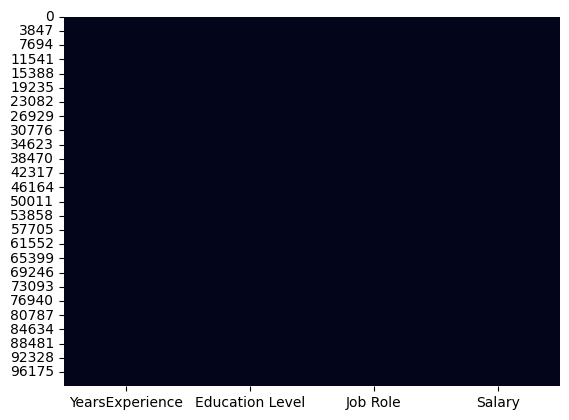

In [9]:
# Verifions les valeurs manquantes avec cette visualisation
sns.heatmap(df.isnull(), cbar=False) # l'ensemble de données ne comporte pas de valeurs manquantes

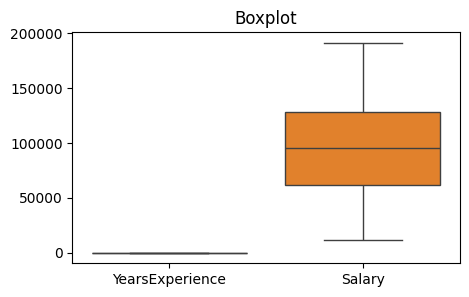

In [10]:
# verifions si notre ensemble de données ne comporte pas de valeurs abérantes
plt.figure(figsize=(5,3))
sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()
# l'ensemble ne comporte pas de valeurs abérrantes


In [11]:
# Fréquence de niveau d'étude dans l'ensemble de données
df['Education Level'].value_counts()

,count
Education Level,
PhD,20232
Bachelor's,20163
Master's,19918
High School,19900
Associate Degree,19787


In [12]:
# Fréquence de type d'emploie dans l'ensemble de données
df['Job Role'].value_counts()

,count
Job Role,
Data Scientist,20127
Software Engineer,20063
Business Analyst,19986
Product Manager,19959
Marketing Specialist,19865


In [13]:
# Matrice de corrélation
df[['Salary','YearsExperience']].corr()

,Salary,YearsExperience
Salary,1.000000,0.982732
YearsExperience,0.982732,1.000000


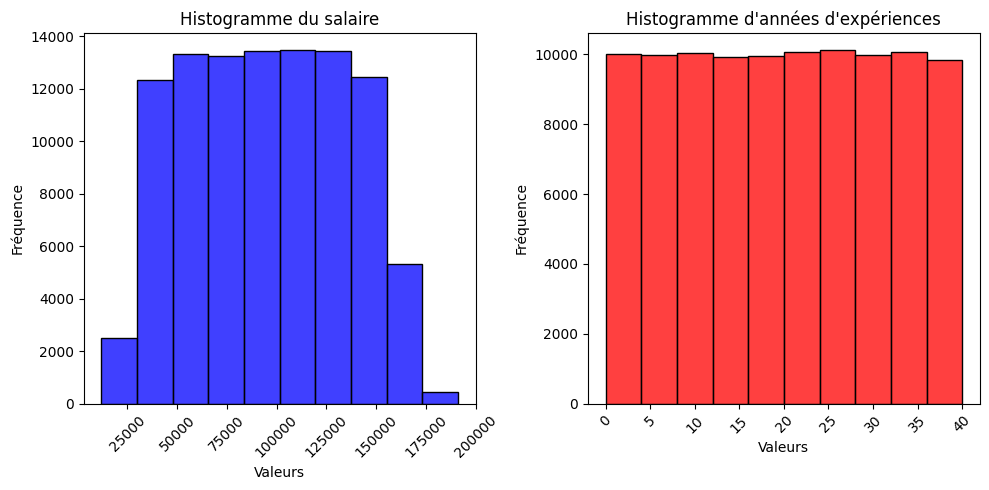

In [14]:
# Histogramme de la variable salaire et annés d'expérience
data1 = df['Salary']
data2 = df['YearsExperience']

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Histogramme du salaire
sns.histplot(data1, bins=10, color='blue', edgecolor='black', kde=False, ax=axes[0])
axes[0].set_title("Histogramme du salaire")
axes[0].set_xlabel("Valeurs")
axes[0].set_ylabel("Fréquence")
axes[0].tick_params(axis='x', rotation=45)  # Rotation des valeurs X

# Histogramme d'années d'expériences
sns.histplot(data2, bins=10, color='red', edgecolor='black', kde=False, ax=axes[1])
axes[1].set_title("Histogramme d'années d'expériences")
axes[1].set_xlabel("Valeurs")
axes[1].set_ylabel("Fréquence")
axes[1].tick_params(axis='x', rotation=45)  # Rotation des valeurs X

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

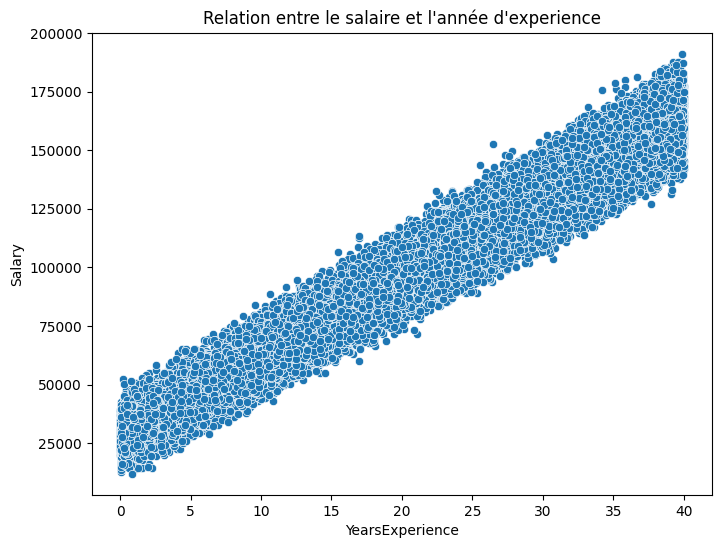

In [15]:
# Evolution du salaire en fonction d'année d'expérience
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relation entre le salaire et l\'année d\'experience')
plt.show()

In [16]:
df['Job Role'].value_counts()

,count
Job Role,
Data Scientist,20127
Software Engineer,20063
Business Analyst,19986
Product Manager,19959
Marketing Specialist,19865


In [17]:
# Le salaire moyens pour les catégories d'emploi
# Calcul du salaire moyen par catégorie
salaire_moyen = df.groupby("Job Role")["Salary"].mean().round(3)

# Afficher le résultat
print(salaire_moyen)

Job Role
Business Analyst         93558.378
Data Scientist          102153.748
Marketing Specialist     89209.912
Product Manager          97430.117
Software Engineer        93381.411
Name: Salary, dtype: float64


In [18]:
# Le salaire maximal pour le catégorie d'emploie
salaire_maximal = df.groupby("Job Role")["Salary"].max().round(3)

# Afficher le résultat
print(salaire_maximal)


Job Role
Business Analyst        174617.90
Data Scientist          191232.00
Marketing Specialist    167241.51
Product Manager         182691.55
Software Engineer       176179.75
Name: Salary, dtype: float64


In [19]:
# Analyse de la variance du niveau d'éducation et le salaire
# Séparation des groupes
groupes = [df[df['Education Level'] == cat]['Salary'] for cat in df['Education Level'].unique()]

# Test ANOVA
f_stat, p_value = stats.f_oneway(*groupes)
print(f"F-statistique: {f_stat}, p-value: {p_value}")

F-statistique: 1.1768301337908063, p-value: 0.3186743511541262


In [20]:
def eta_squared(x, y):
    groups = [y[x == cat] for cat in np.unique(x)]
    ss_between = sum(len(g) * (g.mean() - y.mean()) ** 2 for g in groups)
    ss_total = sum((y - y.mean()) ** 2)
    return ss_between / ss_total

eta2 = eta_squared(df['Education Level'].values, df['Salary'].values)
print(f"Eta²: {eta2}") # Eta² est: 4.7073343125641976e-05 donc le niveau d'éducation n'influence pas le salire

Eta²: 4.7073343125641976e-05


In [21]:
eta3= eta_squared(df['Job Role'].values, df['Salary'].values)
print(f"Eta²: {eta3}") #Eta² est:0.012244513316404521 donc le type de poste d'emploi n'influence pas le salire

Eta²: 0.012244513316404521


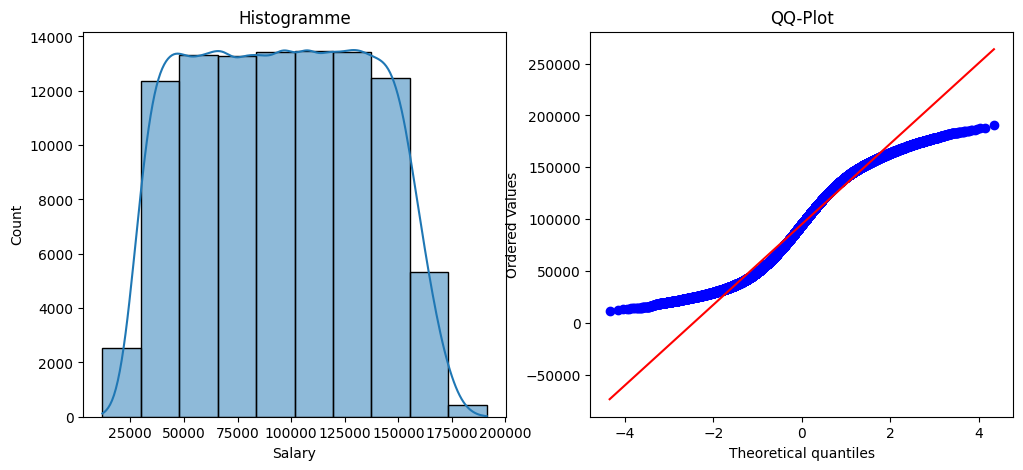

In [22]:
# Vérifions si Salaire suit une distribution normale
valeurs = df["Salary"]

# Histogramme
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(valeurs, kde=True, bins=10)
plt.title("Histogramme")

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(valeurs, dist="norm", plot=plt)
plt.title("QQ-Plot")

plt.show()

In [23]:
# Supposons que la variable catégorique soit "Categorie" et la variable numérique "Salary"
groupes1 = [df[df['Job Role'] == cat]['Salary'] for cat in df['Job Role'].unique()]

# Test de Kruskal-Wallis
h_stat, p_value = stats.kruskal(*groupes1)

# Résultats
print(f"Statistique de Kruskal-Wallis: {h_stat}, p-value: {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il y a une différence significative entre les groupes.")
else:
    print("Aucune différence significative entre les groupes.")

Statistique de Kruskal-Wallis: 1085.0506052266146, p-value: 1.3166627489101829e-233
Il y a une différence significative entre les groupes.


In [24]:
df.head()

,YearsExperience,Education Level,Job Role,Salary
0,14.98,PhD,Marketing Specialist,77861.24
1,38.03,PhD,Software Engineer,166880.38
2,29.28,Bachelor's,Business Analyst,123573.27
3,23.95,Master's,Marketing Specialist,90155.08
4,6.24,Master's,Business Analyst,55931.41


# **Ingénerie des données**

In [25]:
# Encoder les variables niveau d'éducation et le type de poste
data = pd.get_dummies(df, columns=['Education Level', 'Job Role'], drop_first=True)
data.head()

,YearsExperience,Salary,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Job Role_Data Scientist,Job Role_Marketing Specialist,Job Role_Product Manager,Job Role_Software Engineer
0,14.98,77861.24,False,False,False,True,False,True,False,False
1,38.03,166880.38,False,False,False,True,False,False,False,True
2,29.28,123573.27,True,False,False,False,False,False,False,False
3,23.95,90155.08,False,False,True,False,False,True,False,False
4,6.24,55931.41,False,False,True,False,False,False,False,False


# **Modélisation**

In [26]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [27]:
scaler = StandardScaler()

In [28]:
X['YearsExperience'] = scaler.fit_transform(X[['YearsExperience']])

In [29]:
# Division des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.2, random_state=42)

In [30]:
# Model de RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [31]:
# Recherche d'hyper parametres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [32]:
modelcv = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)

In [33]:
modelcv.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [34]:
# Entrainement du model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Prédiction
y_pred = model.predict(X_test)

In [36]:
y_predcv = modelcv.predict(X_test)

In [37]:
# Validation croisée
cv_scores = cross_val_score(modelcv, X, y, cv=5, scoring='r2')

In [38]:
# Affichage des résultats
print(f"Scores de validation croisée (R²) : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {np.mean(cv_scores)}")
print(f"Écart-type des scores de validation croisée : {np.std(cv_scores)}")

Scores de validation croisée (R²) : [0.97948485 0.97950884 0.97948259 0.97938649 0.97974419]
Moyenne des scores de validation croisée : 0.9795213920601651
Écart-type des scores de validation croisée : 0.0001190271063534148


# **Evaluation**

In [39]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 6500.4817129520525
MAE: 5175.465676811391
R²: 0.9728823278250447


In [40]:
# Verifions le surajustement du model
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f"R² sur l'ensemble d'entraînement : {train_r2}")

R² sur l'ensemble d'entraînement : 0.9919628539928705


In [41]:
# Évaluation du modèle
mse_cv = mean_squared_error(y_test, y_predcv)
rmse_cv = np.sqrt(mse)
mae_cv = mean_absolute_error(y_test, y_predcv)
r2_cv = r2_score(y_test, y_predcv)

print(f"RMSE: {rmse_cv}")
print(f"MAE: {mae_cv}")
print(f"R²: {r2_cv}")

RMSE: 6500.4817129520525
MAE: 4519.816524050391
R²: 0.9793215337819701


In [42]:
# Verifions le surajustement du model
y_train_pred = modelcv.predict(X_train)
train_r2_cv = r2_score(y_train, y_train_pred)
print(f"R² sur l'ensemble d'entraînement : {train_r2_cv}")

R² sur l'ensemble d'entraînement : 0.9811269758117622


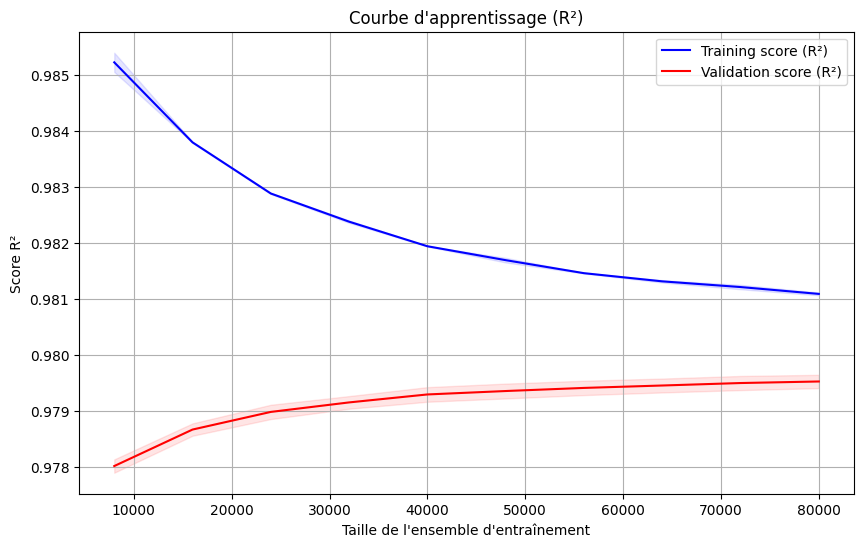

In [44]:
# Calcul des courbes d'apprentissage avec le score R²
train_sizes, train_scores, val_scores = learning_curve(
    modelcv, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcul des moyennes et écarts-types
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score (R²)", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Validation score (R²)", color="red")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="red")

plt.title("Courbe d'apprentissage (R²)")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score R²")
plt.legend(loc="best")
plt.grid()
plt.show()


# **Test**

In [ ]:
YearsExperience	Education Level	Job Role
14.98	PhD	Marketing Specialist

In [ ]:
new_data = pd.DataFrame({
    'YearsExperience': [14.98],  # Remplacez par la colonne exacte de votre dataset
    'Education Level': ['PhD'],     # Remplacez par la colonne exacte de votre dataset
    'Job Role': ['Marketing Specialist']  # Remplacez par la colonne exacte de votre dataset
})

# Si vos données nécessitent un prétraitement (encodage, normalisation, etc.), appliquez-le ici
# Par exemple, si vous avez utilisé OneHotEncoder pour les variables catégorielles :
# new_data_encoded = encoder.transform(new_data)

# Faire la prédiction
predicted_salary = model.predict(new_data)

# Afficher le résultat
print(f"Le salaire prédit pour un Data Scientist avec un Master et 2 ans d'expérience est : {predicted_salary[0]:.2f} $")